Credit Card Data Sample:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

       

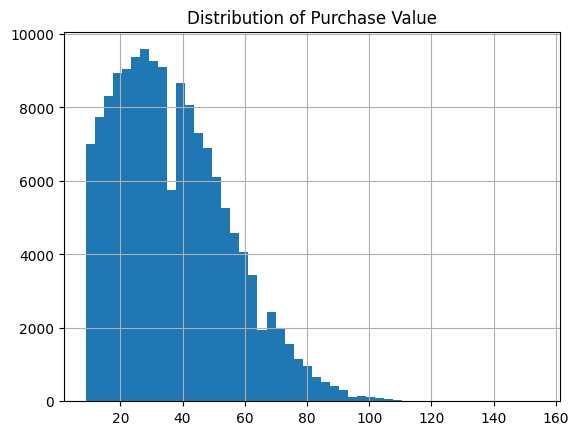

Plotting Purchase Value vs Fraud Class...


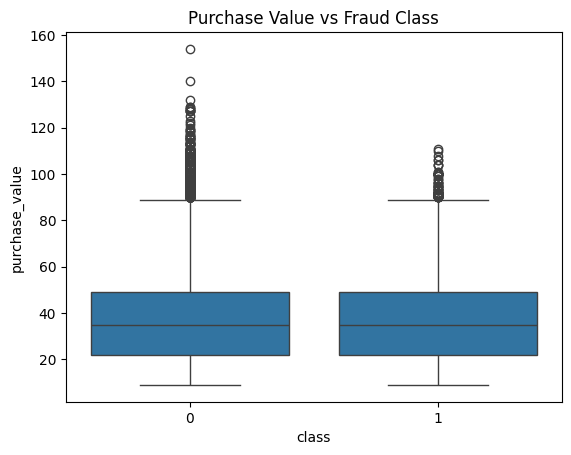

Merged Data Sample:
   user_id         signup_time       purchase_time  purchase_value  \
0    22058 2015-02-24 22:55:49 2015-04-18 02:47:11              34   
1   333320 2015-06-07 20:39:50 2015-06-08 01:38:54              16   
2     1359 2015-01-01 18:52:44 2015-01-01 18:52:45              15   
3   150084 2015-04-28 21:13:25 2015-05-04 13:54:50              44   
4   221365 2015-07-21 07:09:52 2015-09-09 18:40:53              39   

       device_id source browser sex  age       ip_address  class country  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39   73275836879972      0     NaN  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  350311387865908      0     NaN  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  262147382011095      1     NaN  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  384054244391396      0     NaN  
4  NAUITBZFJKHWW    Ads  Safari   M   45  415583117452712      0     NaN   

Fraud Data with New Features:
   user_id         signup_time       purchase_time  purchase_value  \
0    22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
creditcard_data = pd.read_csv('../data/creditcard.csv')
fraud_data = pd.read_csv('../data/Fraud_Data.csv')
ip_data = pd.read_csv('../data/IpAddress_to_Country.csv')

# Display the first few rows of each dataset
print("Credit Card Data Sample:")
print(creditcard_data.head(), "\n")
print("Fraud Data Sample:")
print(fraud_data.head(), "\n")
print("IP Address Data Sample:")
print(ip_data.head(), "\n")

# Checking for missing values
print("Credit Card Data Missing Values:\n", creditcard_data.isnull().sum(), "\n")
print("Fraud Data Missing Values:\n", fraud_data.isnull().sum(), "\n")
print("IP Address Data Missing Values:\n", ip_data.isnull().sum(), "\n")

# Drop rows with missing values
creditcard_data.dropna(inplace=True)
fraud_data.dropna(inplace=True)
ip_data.dropna(inplace=True)

# Removing duplicates
creditcard_data.drop_duplicates(inplace=True)
fraud_data.drop_duplicates(inplace=True)
ip_data.drop_duplicates(inplace=True)

# Convert relevant columns to datetime
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# Univariate analysis for fraud_data: Distribution of Purchase Value
print("Plotting Distribution of Purchase Value...")
fraud_data['purchase_value'].hist(bins=50)
plt.title('Distribution of Purchase Value')
plt.show()

# Bivariate analysis between purchase_value and fraud class
print("Plotting Purchase Value vs Fraud Class...")
sns.boxplot(x='class', y='purchase_value', data=fraud_data)
plt.title('Purchase Value vs Fraud Class')
plt.show()

# Convert IP addresses to string, handle NaNs, and then to integer format
fraud_data['ip_address'] = fraud_data['ip_address'].astype(str).apply(lambda ip: int(ip.replace('.', '')) if ip != 'nan' else 0)

# Merge with IP Address dataset
merged_data = pd.merge(fraud_data, ip_data, how='left',
                       left_on='ip_address', right_on='lower_bound_ip_address')

# Drop unnecessary columns from merge
merged_data.drop(['lower_bound_ip_address', 'upper_bound_ip_address'], axis=1, inplace=True)

# Display the merged data
print("Merged Data Sample:")
print(merged_data.head(), "\n")

# Feature Engineering: Transaction Frequency & Velocity
fraud_data['transaction_frequency'] = fraud_data.groupby('user_id')['user_id'].transform('count')
fraud_data['transaction_velocity'] = (fraud_data['purchase_time'] - fraud_data['signup_time']).dt.total_seconds() / 3600

# Feature Engineering: Time-based Features
fraud_data['hour_of_day'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek

# Normalize purchase_value and transaction_velocity
scaler = MinMaxScaler()
fraud_data[['purchase_value', 'transaction_velocity']] = scaler.fit_transform(fraud_data[['purchase_value', 'transaction_velocity']])

# One-hot encoding for categorical columns
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex'], drop_first=True)

# Display the final fraud_data with new features
print("Fraud Data with New Features:")
print(fraud_data.head(), "\n")
